##Multiple Regression KC House Data

Menggunakan algoritma Mini Batch Gradient Descent

Step penyelesaian:
1. Analisis Data
2. Data Preprocessing
3. Linear Regression


##Analisis Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def standarization(x,row):
    return (x-row.mean())/row.std()    

def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(11, 11))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)    
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
    
    
df = pd.read_csv('kc_house_data.csv')


Cek jika terdapat nilai null

In [2]:
df.isnull().values.any()

False

Plot independent kolom terhadap price

In [3]:
#hapus kolom id dan tanggal
d_norm = df.iloc[:,2:]
d_norm.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


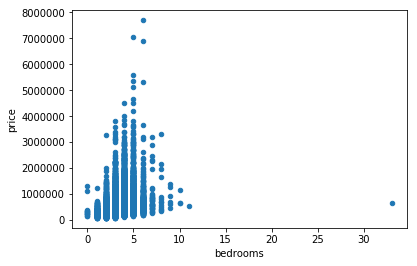

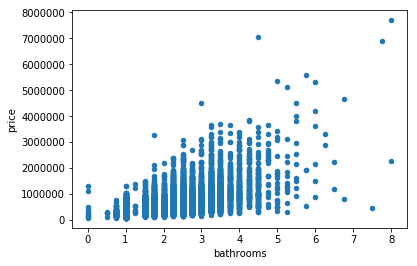

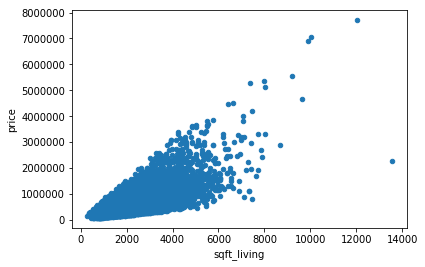

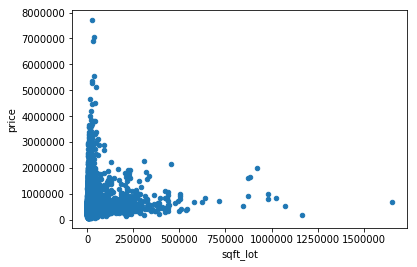

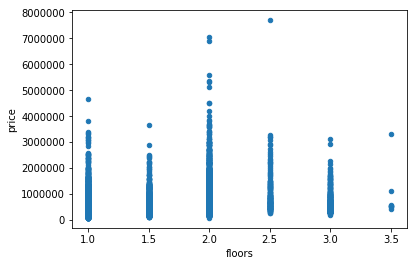

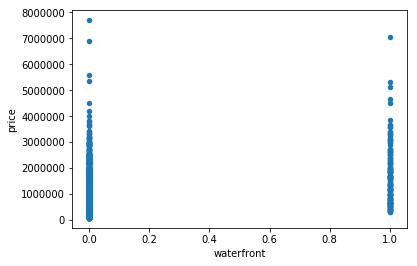

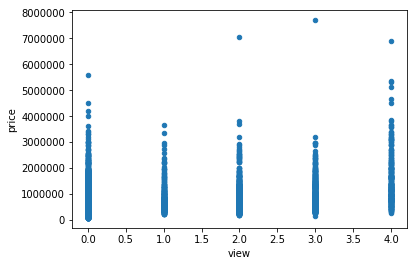

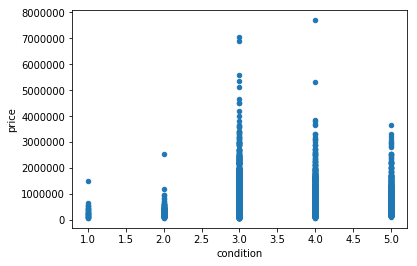

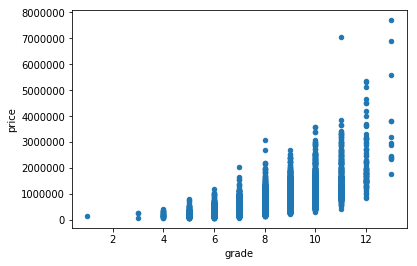

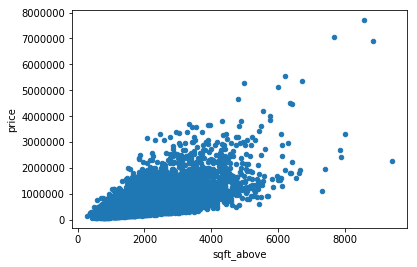

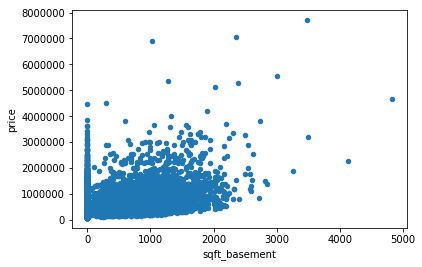

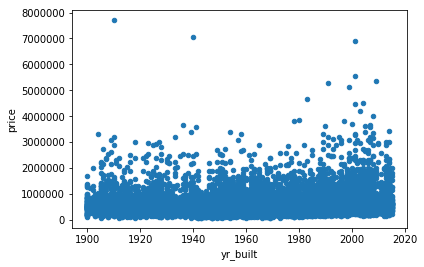

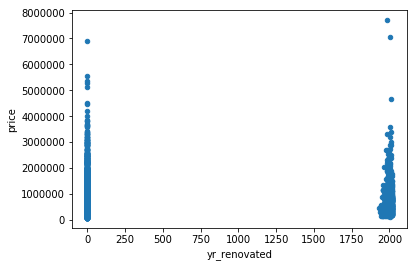

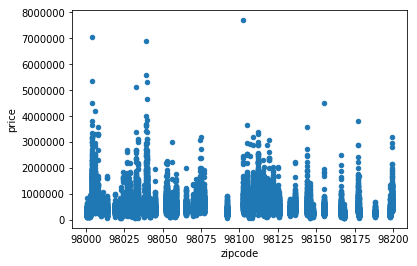

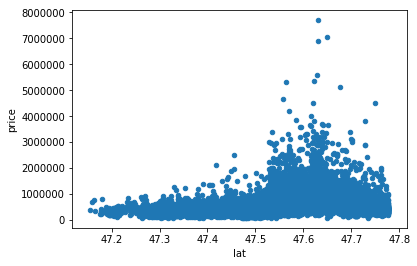

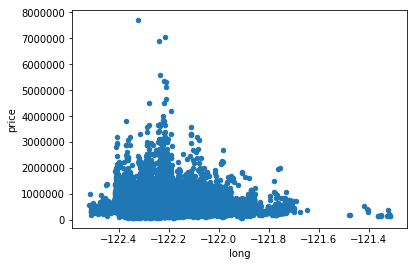

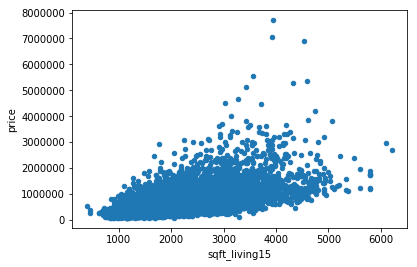

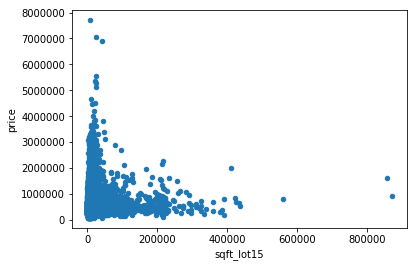

In [4]:
x_vars=d_norm
for x_var in x_vars:
   if x_var=='price':continue
   df.plot(kind='scatter',x=x_var,y='price') 

Terdapat outlier yang cukup jauh pada kolom bedroom, yaitu jumlah kamar yang lebih dari 30 ada 1 data.
asumsi saya, kemungkinan data tersebut salah input

In [5]:
#hapus outlier di bedrooms
d_norm = d_norm[d_norm['bedrooms']<30]

##Korelasi Data
Metode mencari korelasi bisa menggunakan pearson's correlation
![pearson formula](img/pearson.png)

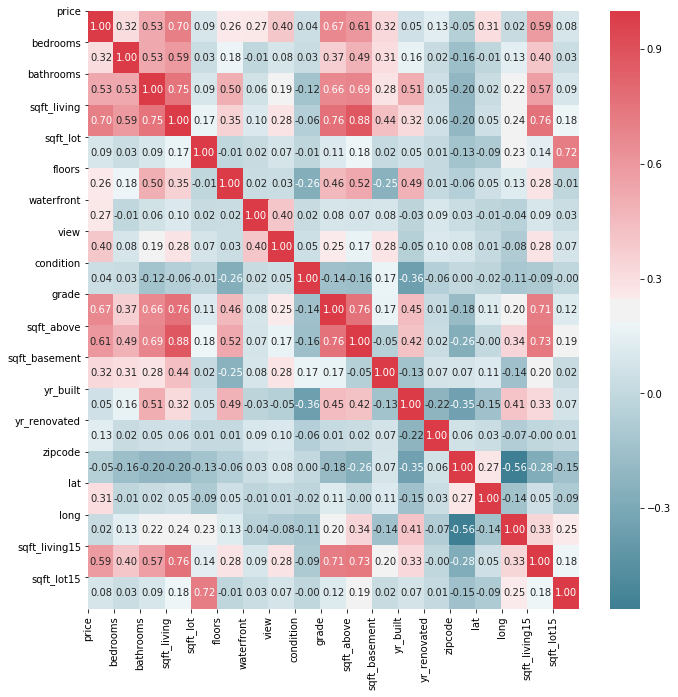

In [6]:
heatMap(d_norm)

Dari data korelasi di atas kita bisa lihat kolom yang memiliki korelasi yang tinggi dengan price adalah:
1. sqft_living (0.70)
2. bathrooms (0.53)
3. grade (0.67)
4. sqft_above (0.61)
5. sqft_living15 (0.59)

saya pilih sqft_living sebagai salah satu predictornya tetapi harus dicek kemungkinan multicoolinearity terhadap predictor lain yang memiliki korelasi yang tinggi.
1. sqft_living - bathrooms (0.75)
2. sqft_living - grade (0.76)
3. sqft_living - sqft_above (0.88)
4. sqft_living - sqft_living15 (0.76)

Pengkategorian kolom :

- price : numeric
- bedrooms : categorical
- bathrooms : numeric
- sqft_living : numeric
- sqft_lot : numeric
- floors : categorical
- waterfront : categorical
- view : numeric
- condition : categorical
- grade : categorical
- sqft_above : numeric
- sqft_basement : numeric
- yr_built : numeric
- yr_renovated : numeric
- zipcode : categorical
- latitude : categorical
- longitude : categorical
- sqft_living15 : numeric

##Data Preprocessing

Untuk kolom numeric dipilih yang memiliki korelasi tinggi

Untuk kolom categorical dipilih mengesampingkan tingkat korelasi

Kolom yang menarik untuk ditambahkan dalam model:
- sqft_living 
- condition: kolom dummy
- floor: kolom dummy
- zipcode: kolom dummy
- view:kolom dummy
- waterfront
- bedrooms: kolom dummy
- grade:kolom dummy

sisa numeric yang memiliki korelasi tinggi tidak dipakai karena kemungkinan terjadi multicoolinearity (predictor dapat memprediksi predictor lain)


 

In [17]:
X_norm = pd.DataFrame()

X_norm['sqft_living'] = d_norm['sqft_living']
#buat kolom dummy grade
dum = pd.get_dummies(d_norm['grade'])
for dcol in dum.columns:
    name = "grade_" + str(dcol)
    X_norm[name] = dum[dcol]
#buat kolom dummy zipcode
dum = pd.get_dummies(d_norm['zipcode'])
for dcol in dum.columns:
    name = "zipcode" + str(dcol)
    X_norm[name] = dum[dcol]

X_norm['view'] = d_norm['view']

X_norm['waterfront'] = d_norm['waterfront']
#buat kolom dummy bedrooms
dum = pd.get_dummies(d_norm['bedrooms'])
for dcol in dum.columns:
    name = "bedrooms" + str(dcol)
    X_norm[name] = dum[dcol]

#buat kolom dummy condition
dum = pd.get_dummies(d_norm['condition'])
for dcol in dum.columns:
    name = "condition" + str(dcol)
    X_norm[name] = dum[dcol]
    
#buat kolom dummy floor
dum = pd.get_dummies(d_norm['floors'])
for dcol in dum.columns:
    name = "floors" + str(dcol)
    X_norm[name] = dum[dcol]

#kolom harga
Y_norm = d_norm['price'].values

In [18]:
print(X_norm.columns)

Index(['sqft_living', 'grade_1', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10',
       ...
       'condition2', 'condition3', 'condition4', 'condition5', 'floors1.0',
       'floors1.5', 'floors2.0', 'floors2.5', 'floors3.0', 'floors3.5'],
      dtype='object', length=108)


In [19]:
#Standard scale dari tiap kolom

#for c in X_norm.columns:
#    X_norm[c] = X_norm[c].apply(lambda x: standarization(x,X_norm[c]))

#memakai library karena terlalu lama dengan code sendiri
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_norm)
X_norm = scalerX.transform(X_norm)

C:\Users\MAMEN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MAMEN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


Pembagian data training : 70% dan testing : 30%

In [20]:
index_train = round(0.7*len(X_norm))
X_train = X_norm[:index_train,:]
X_test = X_norm[index_train:,:]
Y_train = Y_norm[:index_train]
Y_test = Y_norm[index_train:]

##Linear Regression

Algoritma mini batch gradient descent dibuat class sendiri

In [21]:
#prediksi harga menggunakan mini batch, dan tiap batch dihitung 20 data agar lebih cepat
from MiniBatchGD import MiniBatchGradientDescent
reg2 = MiniBatchGradientDescent(X_train, Y_train, X_test, Y_test,0.1,1000,20)
theta, j = reg2.estimate()
reg2.test(X_test,Y_test)


R2 : 0.8078409307306884
adj-R2 : 0.804554871968474


##Hasil

dari prediksi diatas didapat R2 80% menunjukkan model fit dengan data testing sebanyak 80%.

hasil plot dari cost function :

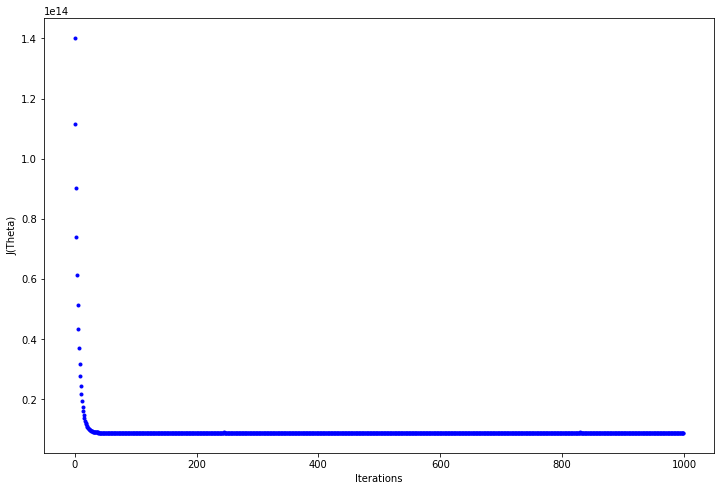

In [22]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(1000),j,'b.')

In [23]:
#MSE
print('MSE:  {:0.3f}'.format(j[-1]))
print('RMSE: {:0.3f}'.format(np.sqrt(j[-1])))

MSE:  8848490405265.145
RMSE: 2974641.223


In [24]:
print(theta)

[ 5.40003390e+05  1.48538736e+05 -3.67299176e+03  4.16268231e+02
 -2.78018978e+02 -5.80640046e+03 -1.92933354e+04 -2.96021454e+04
 -1.26638087e+04  1.89820996e+04  4.02482435e+04  5.02482073e+04
  5.44226912e+04  4.59054593e+04 -2.36505099e+04 -1.72807515e+04
 -2.19225365e+04  6.98246464e+04  1.14284569e+04  8.57422345e+03
  5.80873701e+03  7.41342123e+03 -7.52170634e+03 -4.34261692e+03
 -6.50934938e+03 -7.87035756e+03 -1.93531920e+04 -3.28451827e+04
 -1.72287022e+03 -3.85508959e+03 -6.47505333e+03  2.60290203e+03
 -1.84362889e+04 -1.92811160e+04 -1.53979895e+04  2.35534358e+04
  1.74221532e+03 -2.33653315e+04  4.98490215e+04  3.68279912e+04
 -2.79901211e+04 -8.42694208e+03  7.72290765e+03  3.62615275e+03
 -1.59574040e+04 -1.41934023e+04 -2.14542863e+04 -1.50009960e+04
 -9.96484038e+03 -1.35144794e+04 -2.41505919e+03 -1.93818740e+03
 -6.74608272e+02 -4.59726330e+03 -2.61764204e+04  2.09817318e+04
  2.63084798e+04  3.04470750e+04 -8.68292824e+03  1.62347420e+04
 -6.20436207e+03  2.37399

index ke0 merupakan theta0/intercept, sisanya merupakan koefisien dari tiap kolom